# Рекомендательные системы. Введение

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_ratings = pd.read_csv("data/ratings.csv")
df_movies = pd.read_csv("data/movies.csv")

## Let's see what data do we have

In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [201]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [6]:
df_ratings = df_ratings.merge(df_movies[['movieId', 'title']],how='left', on='movieId')

In [7]:
df_ratings.groupby('rating').count()

,userId,movieId,timestamp,title
rating,,,,
0.5,1370,1370,1370,1370
1.0,2811,2811,2811,2811
1.5,1791,1791,1791,1791
2.0,7551,7551,7551,7551
2.5,5550,5550,5550,5550
3.0,20047,20047,20047,20047
3.5,13136,13136,13136,13136
4.0,26818,26818,26818,26818
4.5,8551,8551,8551,8551


C:\Users\URIST\AppData\Local\Temp\ipykernel_28292\3433334132.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([num for num in ax.get_yticks()])


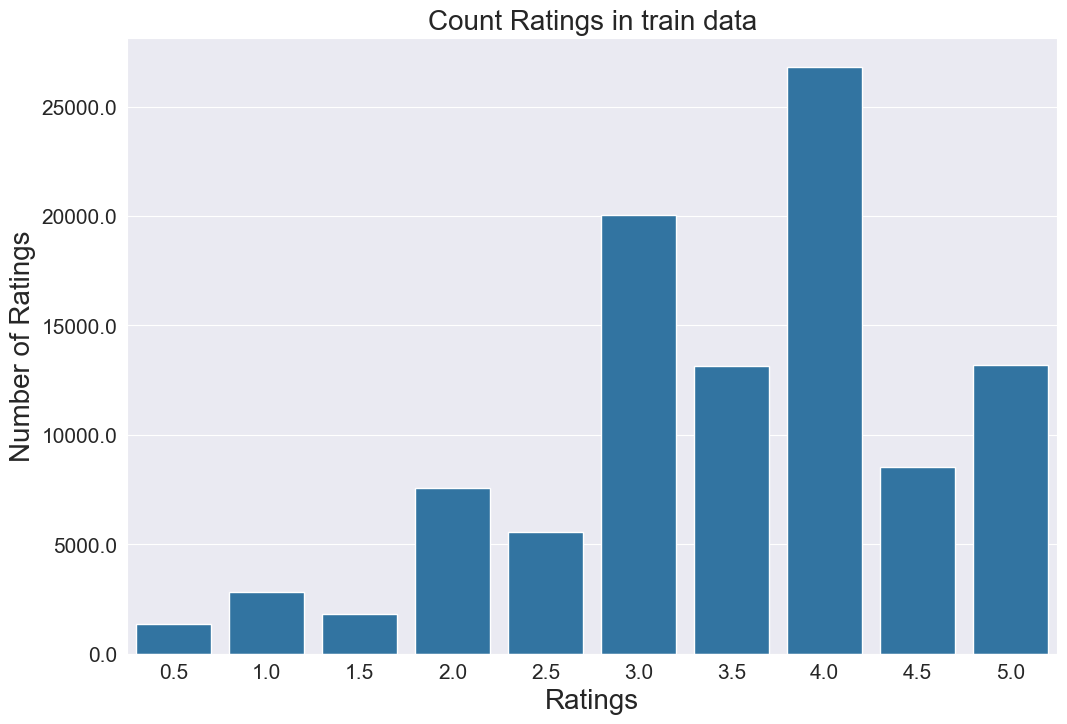

In [8]:
#df_ratings.hist(column='rating')
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data=df_ratings)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

There is at least 20 ratings per user.

In [9]:
df_ratings.groupby(by = "userId")["rating"].count().sort_values(ascending = False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: rating, Length: 610, dtype: int64

There are movies with just one rating.

In [10]:
df_ratings.groupby(by = "title")["rating"].count().sort_values(ascending = False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

## Now we can build a simple user-item matrix

Two things you should notice:
- It's a sparse matrix, meaning that most of the data for each user is NaN
- It's a very wide matirx, in our case it's ~10k columns

In [12]:
df_user_item = df_ratings.pivot_table(index=['userId'], columns=['title'], values='rating')

In [13]:
df_user_item.tail(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,4.0,3.5,3.0,NaN,NaN,2.0,1.5,NaN,NaN


In [14]:
df_user_item.shape

(610, 9719)

This matrix is very heavy to process in memory. The solution is to use Sparse matrix. We will talk more about it in the later lessons.

In [15]:
from scipy import sparse

## Let's do some simple similarity tests

We will first chose a movie and find list of similar movies based on the users' ratings.

In [16]:
forrestGumpRatings = df_user_item['Forrest Gump (1994)']

In [17]:
forrestGumpRatings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    4.0
607    NaN
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), Length: 610, dtype: float64

In [18]:
similarMovies = df_user_item.corrwith(forrestGumpRatings).dropna()

C:\Users\URIST\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\URIST\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\URIST\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\URIST\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\URIST\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [19]:
similarMovies

title
'burbs, The (1989)                0.197712
(500) Days of Summer (2009)       0.234095
*batteries not included (1987)    0.892710
...And Justice for All (1979)     0.928571
10 Cent Pistol (2015)            -1.000000
                                    ...   
[REC]² (2009)                    -0.052414
eXistenZ (1999)                   0.011189
xXx (2002)                        0.306817
xXx: State of the Union (2005)    0.383482
¡Three Amigos! (1986)             0.449692
Length: 5460, dtype: float64

In [20]:
similarMovies.sort_values(ascending=False)[:15]

title
Lost & Found (1999)                                   1.0
Century of the Self, The (2002)                       1.0
The 5th Wave (2016)                                   1.0
Play Time (a.k.a. Playtime) (1967)                    1.0
Memories (Memorîzu) (1995)                            1.0
Playing God (1997)                                    1.0
Killers (2010)                                        1.0
Girl Walks Home Alone at Night, A (2014)              1.0
Tampopo (1985)                                        1.0
Cercle Rouge, Le (Red Circle, The) (1970)             1.0
The Boss (2016)                                       1.0
Poison Ivy: New Seduction (1997)                      1.0
Tale of Two Sisters, A (Janghwa, Hongryeon) (2003)    1.0
Welcome to the Jungle (2013)                          1.0
Take Shelter (2011)                                   1.0
dtype: float64

## How to recommend a movie to a user?

Let's first build a similarity matrix - we will see which movies are alike in terms of users' ratings.

In [21]:
corr_matrix = df_user_item.corr(method='pearson', min_periods=100) # min_periods отвечает за количество наблюдений чтобы сделать оценку по корреляции

In [22]:
corr_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we'll make a recommendation for a user #1.

In [24]:
user_ratings = df_user_item.loc[7].dropna()
user_ratings

title
2001: A Space Odyssey (1968)           4.0
A.I. Artificial Intelligence (2001)    4.5
Aladdin (1992)                         3.0
American Beauty (1999)                 4.0
Apocalypse Now (1979)                  4.0
                                      ... 
What Women Want (2000)                 4.0
Wild Wild West (1999)                  1.5
X-Men (2000)                           3.5
X-Men: The Last Stand (2006)           4.0
X2: X-Men United (2003)                4.0
Name: 7, Length: 152, dtype: float64

In [48]:
simCandidates = pd.Series()
for i in range(0, len(user_ratings.index)): # Идем по списку всех фильмов оцененных пользвателем
    sims = corr_matrix[user_ratings.index[i]].dropna() # Извлекаем фильмы, похожие на оцененные данным юзером (1)
    sims = sims.map(lambda x: x * user_ratings[i]) # Умножаем корреляцию на оценку пользователя по фильму
    simCandidates = simCandidates.append(sims) # Добавляем индекс в список сравниваемых кандидатов
simCandidates.sort_values(inplace = True, ascending = False)

C:\Users\URIST\AppData\Local\Temp\ipykernel_28292\1705671971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sims = sims.map(lambda x: x * user_ratings[i]) # Умножаем корреляцию на оценку пользователя по фильму


AttributeError: 'Series' object has no attribute 'append'

In [49]:
user_ratings.index[7]

'As Good as It Gets (1997)'

In [50]:
corr_matrix[user_ratings.index[7]].dropna()

Series([], Name: As Good as It Gets (1997), dtype: float64)

In [51]:
user_ratings[7]

C:\Users\URIST\AppData\Local\Temp\ipykernel_28292\4195165550.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  user_ratings[7]


0.5

In [52]:
sims = corr_matrix[user_ratings.index[7]].dropna()

In [53]:
sims = sims.map(lambda x: x * user_ratings[7])

In [54]:
sims

Series([], Name: As Good as It Gets (1997), dtype: float64)

In [55]:
simCandidates

Series([], dtype: object)

In [240]:
simCandidates['Matrix, The (1999)']

Matrix, The (1999)    5.000000
Matrix, The (1999)    2.085981
Matrix, The (1999)    1.984178
Matrix, The (1999)    1.945693
Matrix, The (1999)    1.943758
Matrix, The (1999)    1.908045
Matrix, The (1999)    1.711745
Matrix, The (1999)    1.696725
Matrix, The (1999)    1.691286
Matrix, The (1999)    1.684974
Matrix, The (1999)    1.631951
Matrix, The (1999)    1.622664
Matrix, The (1999)    1.356609
Matrix, The (1999)    1.317274
Matrix, The (1999)    1.304178
Matrix, The (1999)    1.282888
Matrix, The (1999)    1.255578
Matrix, The (1999)    1.144888
Matrix, The (1999)    1.144738
Matrix, The (1999)    1.120794
Matrix, The (1999)    1.086472
Matrix, The (1999)    0.995849
Matrix, The (1999)    0.991805
Matrix, The (1999)    0.959204
Matrix, The (1999)    0.931308
Matrix, The (1999)    0.794739
Matrix, The (1999)    0.790310
Matrix, The (1999)    0.669783
Matrix, The (1999)    0.633535
Matrix, The (1999)    0.528805
Matrix, The (1999)   -0.397006
dtype: float64

One movie could be presented several time. That's why we group the rating by movie.

In [41]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.sort_values(inplace = True, ascending = False)

In [42]:
simCandidates

Matrix, The (1999)                                       30.707095
Jurassic Park (1993)                                     28.078650
Star Wars: Episode IV - A New Hope (1977)                27.955474
Star Wars: Episode V - The Empire Strikes Back (1980)    27.739345
Terminator 2: Judgment Day (1991)                        27.421780
                                                           ...    
Dumb & Dumber (Dumb and Dumber) (1994)                    1.096868
Departed, The (2006)                                      1.000000
Babe (1995)                                               0.472172
Eternal Sunshine of the Spotless Mind (2004)              0.467916
Kill Bill: Vol. 1 (2003)                                 -0.046993
Length: 91, dtype: float64

In [43]:
intersection_set = set.intersection(set(simCandidates.index), set(user_ratings.index))
not_watched = list(set(simCandidates.index) - set(user_ratings.index))

In [44]:
print("Intersection: ", len(intersection_set))
print("Not watched: ", len(not_watched))

Intersection:  47
Not watched:  44


We need only the movies that the user has't watched.

In [45]:
filteredSims = simCandidates[not_watched].sort_values(ascending = False)

In [47]:
filteredSims.head(3)

Matrix, The (1999)                                                                30.707095
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    22.002139
Shawshank Redemption, The (1994)                                                  18.925514
dtype: float64

Cold Start
This problem encounters when the system has no information to make recommendations for the new users. As a result, the matrix factorization techniques cannot apply.
This problem brings two observations:
How to recommend a new video for users?
What video to recommend to new users?
Solutions:
Suggest or ask users to rate videos.
Default voting for videos.
Use other techniques like content-based or demographic for the initial phase.